Chapter 5: Why are deep neural networks hard to train?
--------------------------------------------------

Notebook to accompany lecture on Chapter 5 of Michael Nielsen's online Open Source book 
["Neural Networks and Deep Learning"](http://neuralnetworksanddeeplearning.com/chap5.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib import *
%matplotlib inline

import sys
sys.path.append('scripts')
print sys.path

['', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/usr/lib/python2.7/lib-old', '/usr/lib/python2.7/lib-dynload', '/usr/local/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages', '/usr/lib/python2.7/dist-packages/PILcompat', '/usr/lib/python2.7/dist-packages/gtk-2.0', '/usr/local/lib/python2.7/dist-packages/IPython/extensions', '/home/dash/.ipython', 'scripts']


# Deep vs. Shallow Networks

It is possible to design any function with a "shallow" network of only 2 layers, assuming we are allowed
to have complex decision units in the layers (e.g. decision units that allow for large numbers of inputs, and
can make non-linear decisions).  In fact, the approach that was developed in the previous chapter 4, 
to demonstrate the universal nature of neural networks to be able to compute any function, basically
gave an intuitive proof of this idea, as the networks that were developed there only had 2 or 3 layers.

However, just because it is possible to compute any function using such shallow networks doesn't mean
it is necessarily a good idea.  Humans generally solve complex tasks by breaking them down into
easier subtasks, and breaking those down further if they are still too complex (functional decomposition).
A deep network architecture may allow neural network solutions that are more like this human
approach to solving a task by decomposing the complex task into easier subtasks.

But a deep architecture may not be just a matter of easier design (or easier discovery/learning of
a network that solves a task).  There are also mathematical proofs that show that some types of
tasks will take exponentially more decision units to solve if we are restricted to a shallow
architecture.  In practical terms, it thus might be infeasible to solve or compute the solution
to a problem using such a shallow network, but allowing for a deep network architecture would
greatly reduce the number of decision units, and make it feasible to do on a practical
real computer.


Up till now, almost all the networks we've worked with have just a single hidden layer of neurons (plus the input and output 
layers):

<img src="files/figures/single-hidden-layer.png">

These simple networks have been remarkably useful.  We have used them to classify a fairly difficult handwritten digits 
task with 98 percent accuracy.  Nonetheless, intuitively we'd expect networks with many more hidden layers to be more powerful:

<img src="files/figures/deep-hidden-layers.png">

Such networks could use the intermediate layers to build up multiple layers of abstraction.  For example, if we're doing
visual pattern recognition, then the neurons in the first layer might learn to recognize edges, the neurons in the
second layer could lear to recognize more complex shapes, say triangles or rectangles, built up from edges.  The third
layer could recongize still more complex shapes.  And so on.  These multiple layers of abstraction seem likely to give deep networks
a compelling advantage in learning to solve complex problems.  Moreover, just as in the case of logical circuits, there are
theoretical results suggesting that dep networks are intrinsically more powerful than shallow networks.

Training Deep Networks
----------------------

How can we train such deep networks.  We'll first try our developed stochastic gradient descent by backpropagation methods.  But
we'll run into trouble, with our deep networks not performing much (if at all) better than shallow networks.
That failure seems surprising in the light of the discussion above. Rather than give up on deep networks,
we'll dig down and try to understand what's making our deep networks hard to train. When we look closely,
we'll discover that the different layers in our deep network are learning at vastly different
speeds. In particular, when later layers in the network are learning well, early layers often get
stuck during training, learning almost nothing at all. This stuckness isn't simply due to bad luck.
Rather, we'll discover there are fundamental reasons the learning slowdown occurs, connected to our
use of gradient-based learning techniques.


The Vanishing Gradient Problem
-------------------------------

So, what goes wrong when we try to train a deep network?  First lets recall how the network does with
a single hidden layer of 30 units (here we are using L2 regularization, appropriately set initial
weights, and have appropriate learning and regularization parameters to get good performance on the
resulting network on the test data.

In [2]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [3]:
import network2
net = network2.Network([784, 30, 10])

In [4]:
# as previously, a single hidden layer with 30 units
net.SGD(training_data, 30, 10, 0.1, lmbda=5.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 9271 / 10000

Epoch 1 training complete
Accuracy on evaluation data: 9425 / 10000

Epoch 2 training complete
Accuracy on evaluation data: 9474 / 10000

Epoch 3 training complete
Accuracy on evaluation data: 9513 / 10000

Epoch 4 training complete
Accuracy on evaluation data: 9541 / 10000

Epoch 5 training complete
Accuracy on evaluation data: 9548 / 10000

Epoch 6 training complete
Accuracy on evaluation data: 9547 / 10000

Epoch 7 training complete
Accuracy on evaluation data: 9578 / 10000

Epoch 8 training complete
Accuracy on evaluation data: 9558 / 10000

Epoch 9 training complete
Accuracy on evaluation data: 9579 / 10000

Epoch 10 training complete
Accuracy on evaluation data: 9595 / 10000

Epoch 11 training complete
Accuracy on evaluation data: 9602 / 10000

Epoch 12 training complete
Accuracy on evaluation data: 9602 / 10000

Epoch 13 training complete
Accuracy on evaluation data: 9594 / 10000

Epoch 14 training complete
Acc

([],
 [9271,
  9425,
  9474,
  9513,
  9541,
  9548,
  9547,
  9578,
  9558,
  9579,
  9595,
  9602,
  9602,
  9594,
  9601,
  9598,
  9606,
  9611,
  9614,
  9619,
  9627,
  9610,
  9598,
  9634,
  9637,
  9634,
  9631,
  9613,
  9622,
  9634],
 [],
 [])

We will usually get a network with an accuracy of 96% to 97% (it will vary depending on initial random
weights and other factors).  

Now lets add a second layer of 30 hidden units and see what type of performance we get.

In [5]:
# now what happens if we have 2 hidden layers with 30 units?
net = network2.Network([784, 30, 30, 10])
net.SGD(training_data, 30, 10, 0.1, lmbda=5.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 9162 / 10000

Epoch 1 training complete
Accuracy on evaluation data: 9380 / 10000

Epoch 2 training complete
Accuracy on evaluation data: 9475 / 10000

Epoch 3 training complete
Accuracy on evaluation data: 9551 / 10000

Epoch 4 training complete
Accuracy on evaluation data: 9578 / 10000

Epoch 5 training complete
Accuracy on evaluation data: 9554 / 10000

Epoch 6 training complete
Accuracy on evaluation data: 9603 / 10000

Epoch 7 training complete
Accuracy on evaluation data: 9619 / 10000

Epoch 8 training complete
Accuracy on evaluation data: 9629 / 10000

Epoch 9 training complete
Accuracy on evaluation data: 9637 / 10000

Epoch 10 training complete
Accuracy on evaluation data: 9621 / 10000

Epoch 11 training complete
Accuracy on evaluation data: 9640 / 10000

Epoch 12 training complete
Accuracy on evaluation data: 9648 / 10000

Epoch 13 training complete
Accuracy on evaluation data: 9671 / 10000

Epoch 14 training complete
Acc

([],
 [9162,
  9380,
  9475,
  9551,
  9578,
  9554,
  9603,
  9619,
  9629,
  9637,
  9621,
  9640,
  9648,
  9671,
  9661,
  9656,
  9660,
  9662,
  9684,
  9676,
  9663,
  9673,
  9698,
  9680,
  9693,
  9682,
  9682,
  9675,
  9700,
  9624],
 [],
 [])

Again the results will vary slightly from run to run, but usually it will seem as if there are slight
improvements when we have 2 hidden layers as opposed to 1.  With accuricies of 97% (with a baseline
random guessing of 10%), slight improvements on overall accuracy actually do represent significant gains.
So this result does seem encouraging.  

However, what happens if we add on a third layer of hidden units?

In [6]:
# now what happens if we have 3 hidden layers with 30 units?
net = network2.Network([784, 30, 30, 30, 10])
net.SGD(training_data, 30, 10, 0.1, lmbda=5.0, evaluation_data=validation_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 8491 / 10000

Epoch 1 training complete
Accuracy on evaluation data: 9316 / 10000

Epoch 2 training complete
Accuracy on evaluation data: 9481 / 10000

Epoch 3 training complete
Accuracy on evaluation data: 9542 / 10000

Epoch 4 training complete
Accuracy on evaluation data: 9566 / 10000

Epoch 5 training complete
Accuracy on evaluation data: 9561 / 10000

Epoch 6 training complete
Accuracy on evaluation data: 9597 / 10000

Epoch 7 training complete
Accuracy on evaluation data: 9578 / 10000

Epoch 8 training complete
Accuracy on evaluation data: 9592 / 10000

Epoch 9 training complete
Accuracy on evaluation data: 9633 / 10000

Epoch 10 training complete
Accuracy on evaluation data: 9600 / 10000

Epoch 11 training complete
Accuracy on evaluation data: 9622 / 10000

Epoch 12 training complete
Accuracy on evaluation data: 9651 / 10000

Epoch 13 training complete
Accuracy on evaluation data: 9636 / 10000

Epoch 14 training complete
Acc

([],
 [8491,
  9316,
  9481,
  9542,
  9566,
  9561,
  9597,
  9578,
  9592,
  9633,
  9600,
  9622,
  9651,
  9636,
  9630,
  9657,
  9642,
  9655,
  9646,
  9606,
  9672,
  9608,
  9618,
  9610,
  9605,
  9666,
  9644,
  9640,
  9671,
  9611],
 [],
 [])

Again it may be hard to always see, but it appears that adding a third layer usually doesn't improve matters
any, and often makes it about the same or a bit worse than having a single hidden layer!

This behaviour seems strange. Intuitively, extra hidden layers ought to make the network able to
learn more complex classification functions, and thus do a better job classifying. Certainly,
things shouldn't get worse, since the extra layers can, in the worst case, simply do nothing.
But that's not what's going on.

So what is going on? Let's assume that the extra hidden layers really could help in principle,
and the problem is that our learning algorithm isn't finding the right weights and biases.
We'd like to figure out what's going wrong in our learning algorithm, and how to do better.

Below is a visualization of a snapshot of learning for a network with two hidden layers.  Only
the first 6 units in each of the hidden layers is shown.  The bars represent the gradient with
respect to the bias parameter at this point in time for each of the units:

<img src="files/figures/deep-learning-gradients.png">

This snapshot is from the very beginning of training, e.g. right after the weights and biases are
initially created with random values.  One thing that jumps out is that it appears that the
gradients (the rate at which the units are learning) in general are much higher for the second
hidden layer than the first.  This analysis can be done more formally.  For example, you can
use the gradients as a (N=30) vector, and measure the length of this vector as a rough measure of
the overall magnitude of the gradients.  In the textbook, for one particular instance, the
magnitude of the bias gradients for the first hidden layer was 0.07 while that for the second
hidden layer was 0.31.  And in general, if you create a network at random and make this same analysis,
you will always find that the learning gradients are about 4 or 5 times greater for the second hidden layer.

What happens if we add more hidden layers? If we have three hidden layers, 
in a (784,30,30,30,10) network, then the respective speeds of learning turn out to 
be 0.012, 0.060, and 0.283. Again, earlier hidden layers are learning much slower than
later hidden layers. Suppose we add yet another layer with 30 hidden neurons. In
that case, the respective speeds of learning are 0.003, 0.017, 0.070, and 0.285.
The pattern holds: early layers learn slower than later layers.

We've been looking at the speed of learning at the start of training, that is,
just after the networks are initialized. How does the speed of learning change
as we train our networks? Let's return to look at the network with just two
hidden layers. The speed of learning changes as follows:

<img src="files/figures/training-speed-2-layers.png">

As you can see the two layers start out learning at very different speeds (as we already know).
The speed in both layers then drops very quickly, before rebounding. But through it all,
the first hidden layer learns much more slowly than the second hidden layer.

What about more complex networks? Here's the results of a similar experiment, but this time 
with four hidden layers (a 784,30,30,30,30,10 network):

<img src="files/figures/training-speed-4-layers.png">

Again, early hidden layers learn much more slowly than later hidden layers. In this case,
the first hidden layer is learning roughly 100 times slower than the final hidden layer.
No wonder we were having trouble training these networks earlier!

We have here an important observation: in at least some deep neural networks, the
gradient tends to get smaller as we move backward through the hidden layers. This
means that neurons in the earlier layers learn much more slowly than neurons in
later layers. And while we've seen this in just a single network, there are fundamental
reasons why this happens in many neural networks. The phenomenon is known as
the *vanishing gradient problem*.

Why does the vanishing gradient problem occur? Are there ways we can avoid it? And how
should we deal with it in training deep neural networks? 

# Whats Causing the Vanishing Gradient Problem?

To get insight into why the vanishing gradient problem occurs, let's consider the simplest deep neural network: one with just a single neuron in each layer. Here's a network with three hidden layers:

<img src="files/figures/tikz37.png">

**Why the vanishing gradient problem occurs**: To understand why the vanishing gradient problem occurs,
let's explicitly write out the entire expression for the gradient:

$$
\frac{\partial C}{\partial b_1} = \sigma' (z_1) w_2 \sigma' (z_2) w_3 \sigma' (z_3) w_4 \sigma' (z_4) \frac{\partial C}{\partial a_4}
$$

Excepting the very last term, this expression is a product of terms of the form $w_j \sigma' (z_j)$.
To understand how each of those terms behave, let's look at a plot of the function $\sigma'$.

In [7]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

sigmoid_vec = np.vectorize(sigmoid)

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

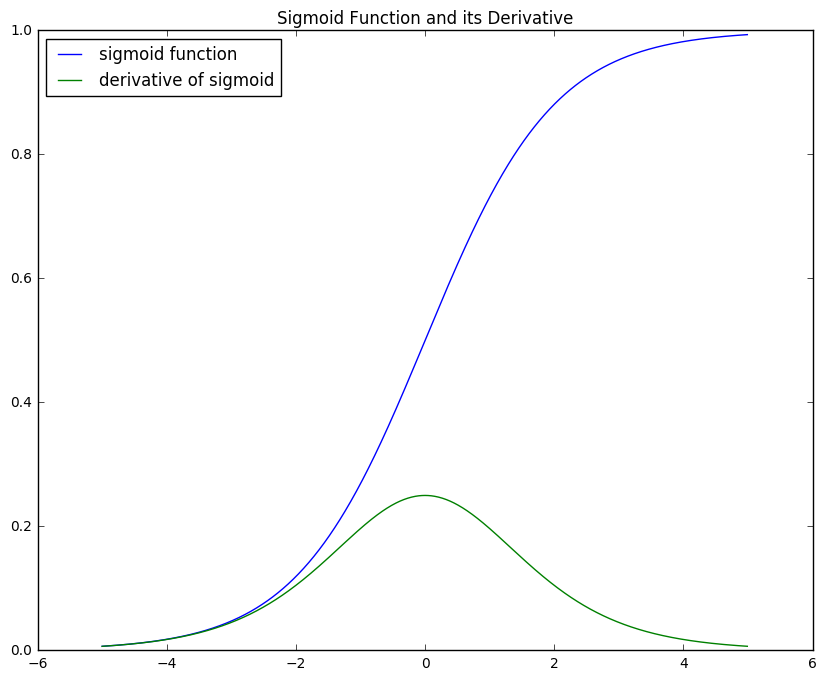

In [8]:
x = np.arange(-5, 5, 0.01)
y = sigmoid(x)
plt.figure(figsize=(10, 8))
plt.plot(x, y, label='sigmoid function')
y = sigmoid_prime(x)
plt.plot(x, y, label='derivative of sigmoid')
plt.legend(loc=0)
plt.title('Sigmoid Function and its Derivative')

pass

The derivative reaches a maximum at $\sigma' (0) = \frac{1}{4}$ .  Now, if we use our standard
approach to initializing the weights in the network, then we'll choose the weights using a Gaussian
with mean 0 and standard deviation 1. So the weights will usually satisfy $|w_j| < 1$.
Putting these observations together, we see that the terms $w_j \sigma' (z_j)$
will usually satisfy $|w_j \sigma' (z_j)| < \frac{1}{4}$.  And when we take a product
of many such terms, the product will tend to exponentially decrease: the more terms,
the smaller the product will be. This is starting to smell like a possible explanation
for the vanishing gradient problem.

**The unstable gradient problem**: The fundamental problem here isn't so much the vanishing gradient problem or the exploding gradient problem. It's that the gradient in early layers is the product of terms from all the later layers. When there are many layers, that's an intrinsically unstable situation. The only way all layers can learn at close to the same speed is if all those products of terms come close to balancing out. Without some mechanism or underlying reason for that balancing to occur, it's highly unlikely to happen simply by chance. In short, the real problem here is that neural networks suffer from an unstable gradient problem. As a result, if we use standard gradient-based learning techniques, different layers in the network will tend to learn at wildly different speeds.

# Unstable Gradients in more Complex Networks

We've been studying toy networks, with just one neuron in each hidden layer. What about more complex deep networks, with many neurons in each hidden layer?

In fact, much the same behaviour occurs in such networks. In the earlier chapter on backpropagation we saw that the gradient in the lth layer of an L layer network is an expression that is similar to the one we worked out
for the simple network above, the main difference being that the gradients will be the result of the
combination of many backward propagated weights and derivatives of the sigmoid on their activation.

More generally, the large number of terms in the product tends to lead to an unstable gradient, just as in our earlier example. In practice, empirically it is typically found in sigmoid networks that gradients vanish exponentially quickly in earlier layers. As a result, learning slows down in those layers. This slowdown isn't merely an accident or an inconvenience: it's a fundamental consequence of the approach we're taking to learning.